In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.preprocessing import Imputer

In [2]:
rocker = pd.read_csv('./dataset.csv')

In [3]:
rocker.head()

,day,imps,clicks,convs,category,domain,view_rate
0,7/19/16 0:00,2,0,0,Local News,mycci.net,0.000000
1,7/28/16 0:00,208,0,0,Home Furnishings,myuncommonsliceofsuburbia.com,0.238095
2,7/27/16 0:00,5,0,0,(undefined),pillsbury.com,0.000000
3,7/27/16 0:00,4,0,0,Arts & Entertainment,thelist.com,0.000000
4,7/26/16 0:00,1,0,0,Games,trialgames.com,0.000000


Converting to datetime and setting day column to index

In [4]:
# Converting 'day' column to datetime dtype
rocker['day'] = pd.to_datetime(rocker['day'])

In [5]:
# Setting day column to index and sorting dates in chronological order
rocker.set_index('day', inplace=True)
rocker.sort_index(inplace=True)

In [6]:
# Checking the datatypes
rocker.dtypes

imps           int64
clicks         int64
convs          int64
category      object
domain        object
view_rate    float64
dtype: object

In [7]:
# Checking the first 5 rows
rocker.head()

,imps,clicks,convs,category,domain,view_rate
day,,,,,,
2016-07-14,1,0,0,Local News,yam.com,0.000000
2016-07-14,1,0,0,Broadcast & Network News,kwwl.com,1.000000
2016-07-14,8,0,0,Non-Alcoholic Beverages,mycokerewards.com,0.000000
2016-07-14,1,0,0,(undefined),petsorama.com,0.000000
2016-07-14,16,0,0,Local News,chattanoogan.com,0.384615


In [8]:
rocker.describe()

,imps,clicks,convs,view_rate
count,233801.000000,233801.000000,233801.000000,233801.000000
mean,22.666323,0.002070,0.003760,0.257160
std,552.564788,0.068872,0.140841,0.359638
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000,0.500000
max,92489.000000,10.000000,20.000000,1.000000


In [9]:
rocker.shape

(233801, 6)

# Exploring the data

In [10]:
# Checking for nulls
rocker.isna().sum()

imps         0
clicks       0
convs        0
category     0
domain       0
view_rate    0
dtype: int64

In [11]:
# Checking number of clicks
rocker['clicks'].value_counts()

0     233445
1        297
2         34
3          9
4          7
10         2
7          2
6          2
5          2
8          1
Name: clicks, dtype: int64

In [12]:
# Checking amount of conversions
rocker['convs'].value_counts()

0     233331
1        380
2         27
3         13
4         10
6          6
5          6
12         5
9          5
10         4
8          4
7          4
15         3
20         1
17         1
13         1
Name: convs, dtype: int64

In [13]:
# Creating a boolean mask to check conversions that have 0 clicks
mask = (rocker['clicks'] == 0) & (rocker['convs'] > 0)

In [14]:
rocker[mask].head()

,imps,clicks,convs,category,domain,view_rate
day,,,,,,
2016-07-14,10927,0,2,Air Travel,onetravel.com,0.293026
2016-07-14,1394,0,1,Coupons & Discount Offers,woot.com,0.399185
2016-07-14,217,0,1,Weather,weather.com,0.243902
2016-07-14,107,0,1,Outdoors,outdoorlife.tv,0.020000
2016-07-14,14645,0,7,Travel Agencies & Services,priceline.com,0.055280


In [15]:
rocker[mask].shape

(421, 6)

In [16]:
mask = (rocker['view_rate'] == 0) & (rocker['convs'] > 0)

In [17]:
rocker[mask].head()

,imps,clicks,convs,category,domain,view_rate
day,,,,,,
2016-07-14,1,0,1,Retail Stores,samsclub.com,0.0
2016-07-14,5,0,1,Local News,chicagotribune.com,0.0
2016-07-14,68,0,1,World News,inquisitr.com,0.0
2016-07-14,5,0,1,(undefined),lolnewsday.com,0.0
2016-07-15,10,0,1,Radio,radio.com,0.0


In [18]:
# Replacing 0's from clicks column with median click - 1
rocker['clicks'].replace({0:1}, inplace=True)

### There are 421 rows where there are 0 clicks that somehow convert to sales. Assuming customers need to click at least once to convert, I've replace these 0s with the median number of clicks, 1. 

In [19]:
mask = (rocker['view_rate'] == 0) & (rocker['convs'] > 0)

In [20]:
rocker[mask]

,imps,clicks,convs,category,domain,view_rate
day,,,,,,
2016-07-14,1,1,1,Retail Stores,samsclub.com,0.0
2016-07-14,5,1,1,Local News,chicagotribune.com,0.0
2016-07-14,68,1,1,World News,inquisitr.com,0.0
2016-07-14,5,1,1,(undefined),lolnewsday.com,0.0
2016-07-15,10,1,1,Radio,radio.com,0.0
2016-07-15,3,1,1,News,nydailynews.com,0.0
2016-07-16,3,1,1,Service Providers,earthlink.net,0.0
2016-07-17,8,1,1,Web Portals,www.yahoo.com,0.0
2016-07-17,1,1,1,(undefined),pillsbury.com,0.0


In [21]:
# Setting dataframe to observations where view rate is greater than 0
rocker = rocker[rocker['view_rate'] > 0]

### 42 observations have a view rate of 0 and conversion rate greater than 0. It's a small amount of observations relative to this dataset, so I've drop these rows.

In [22]:
# Creating a column for click thru rate (percentage of how many impressions lead to clicks)
rocker['CTR'] = (rocker['clicks']/rocker['imps'] * 100)

In [23]:
# Creating a column for conversion rate (percentage of how many impressions lead to conversions)
rocker['CR'] = (rocker['convs']/rocker['imps'] * 100)

### To answer, Q1 regarding the best metrics, The CTR and CR metrics will give fuller picture of a campaign's success. The clicks and conversions only tell part of the story. Ads must ultimately convert potential customers into paying customers so I think the conversion rate is the most important metric to look at in terms of success. Since I imputed values, the CTR will be less reliable than if the data were properly recorded. We can use the CTR to also learn more about customer behavior. If they click on the ad, they are interested, but if they don't convert it's possible they were expecting different information than what the ad was advertising.

In [24]:
# Creating a boolean mask to view observations with a Conversion Rate above 0
mask = rocker['CR'] > 0

In [25]:
rocker[mask]

,imps,clicks,convs,category,domain,view_rate,CTR,CR
day,,,,,,,,
2016-07-14,10927,1,2,Air Travel,onetravel.com,0.293026,0.009152,0.018303
2016-07-14,1394,1,1,Coupons & Discount Offers,woot.com,0.399185,0.071736,0.071736
2016-07-14,217,1,1,Weather,weather.com,0.243902,0.460829,0.460829
2016-07-14,107,1,1,Outdoors,outdoorlife.tv,0.020000,0.934579,0.934579
2016-07-14,14645,1,7,Travel Agencies & Services,priceline.com,0.055280,0.006828,0.047798
2016-07-14,232,1,1,Cooking & Recipes,beyerbeware.net,0.289617,0.431034,0.431034
2016-07-14,37,1,1,Puzzles & Brainteasers,nametests.com,0.100000,2.702703,2.702703
2016-07-14,3080,1,1,Women's Interests,skinnymom.com,0.137650,0.032468,0.032468
2016-07-14,6205,2,1,TV & Video,bbc.com,0.542435,0.032232,0.016116


In [26]:
# Sets dataframe to observations where conversion rate is greater than 0
rocker = rocker[rocker['CR'] > 0]

## Removing missing values

In [27]:
rocker['domain'].value_counts().head()

boardingarea.com    40
---                 24
wayfair.com         16
cheapoair.com       15
ebay.com            13
Name: domain, dtype: int64

In [28]:
mask = rocker['domain'] == '---'

In [29]:
rocker[mask]

,imps,clicks,convs,category,domain,view_rate,CTR,CR
day,,,,,,,,
2016-07-14,2219,1,1,(undefined),---,0.296528,0.045065,0.045065
2016-07-14,1950,1,1,(undefined),---,0.235964,0.051282,0.051282
2016-07-15,60,1,1,(undefined),---,0.270270,1.666667,1.666667
2016-07-15,1711,1,1,(undefined),---,0.246667,0.058445,0.058445
2016-07-15,2466,1,1,(undefined),---,0.196045,0.040552,0.040552
2016-07-15,21,1,1,(undefined),---,0.384615,4.761905,4.761905
2016-07-15,283,1,1,(undefined),---,0.294737,0.353357,0.353357
2016-07-16,2254,1,1,(undefined),---,0.227020,0.044366,0.044366
2016-07-16,39,1,1,(undefined),---,0.343750,2.564103,2.564103


In [30]:
# Removing values where domain = ('---')
rocker = rocker[rocker['domain'] != '---']

In [31]:
# Checking shape
rocker.shape

(402, 8)

### The ads without a category and domain have low clicks and conversions so they've been removed.

In [32]:
rocker.sort_values(by='CR', ascending=False).head(15)

,imps,clicks,convs,category,domain,view_rate,CTR,CR
day,,,,,,,,
2016-07-16,1,1,1,News,yourdailydish.com,1.000000,100.000000,100.000000
2016-07-21,1,1,1,Politics,joeforamerica.com,1.000000,100.000000,100.000000
2016-07-15,1,1,1,Home Improvement,familyhandyman.com,1.000000,100.000000,100.000000
2016-07-21,1,1,1,Retail Stores,rebelcircus.com,1.000000,100.000000,100.000000
2016-07-24,1,1,1,Local News,ksl.com,1.000000,100.000000,100.000000
2016-07-19,2,1,1,Local News,theeagle.com,0.500000,50.000000,50.000000
2016-07-25,2,1,1,Weather,weather.com,1.000000,50.000000,50.000000
2016-07-20,2,1,1,(undefined),collegefreakz.com,0.500000,50.000000,50.000000
2016-07-17,36,1,13,Retail Stores,samsclub.com,0.200000,2.777778,36.111111


In [33]:
rocker.sort_values(by='CR', ascending=False).tail(15)

,imps,clicks,convs,category,domain,view_rate,CTR,CR
day,,,,,,,,
2016-07-15,8708,1,1,Investing,nasdaq.com,0.165154,0.011484,0.011484
2016-07-18,18754,1,2,Home & Garden,countryliving.com,0.119049,0.005332,0.010664
2016-07-25,19213,1,2,Home & Garden,countryliving.com,0.111136,0.005205,0.010410
2016-07-22,10363,2,1,Air Travel,boardingarea.com,0.427619,0.019299,0.009650
2016-07-15,72860,10,7,Air Travel,cheapoair.com,0.243085,0.013725,0.009607
2016-07-14,90362,10,8,Retail Stores,samsclub.com,0.140717,0.011067,0.008853
2016-07-14,92489,7,8,Air Travel,cheapoair.com,0.236244,0.007568,0.008650
2016-07-17,37290,1,3,Home & Garden,countryliving.com,0.162008,0.002682,0.008045
2016-07-20,43676,1,3,Home & Garden,countryliving.com,0.117978,0.002290,0.006869


### To answer questions 2 and 3 (see graphs below), ads on home improvement sites seem to perform well. However, it would be interesting to see how these ads would perform if the impressions were higher. As view rate increases, conversions increase, but there is a drop off after a 50% view rate. It's important to be strategic regarding the sizes, placements and domains of ads. Looking at the correlation between conversions and impressions, ads that receive less than 40,000 impressions have the highest conversions. Sites that receive a large amount of traffic may not be the best for advertisements meant for a more niche audience.

Text(0.5, 1.0, 'Conversions by Impressions')

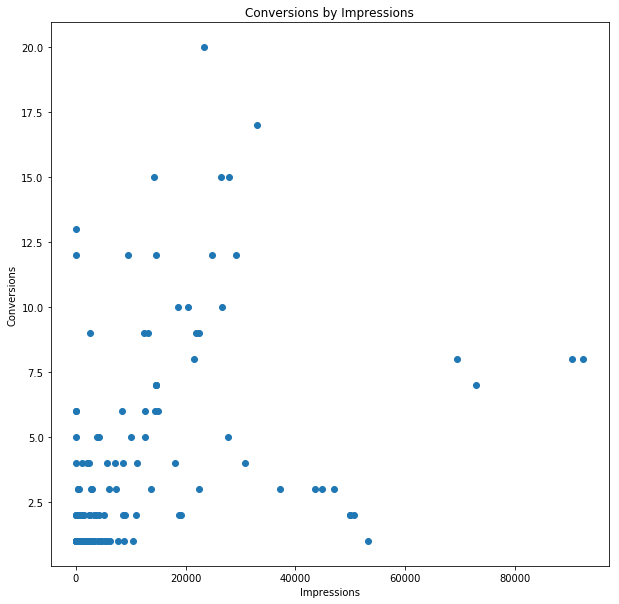

In [34]:
plt.figure(figsize=(10, 10))
plt.scatter(rocker['imps'], rocker['convs'])
plt.xlabel('Impressions')
plt.ylabel('Conversions')
plt.title('Conversions by Impressions')

Text(0.5, 1.0, 'Conversions by View Rate')

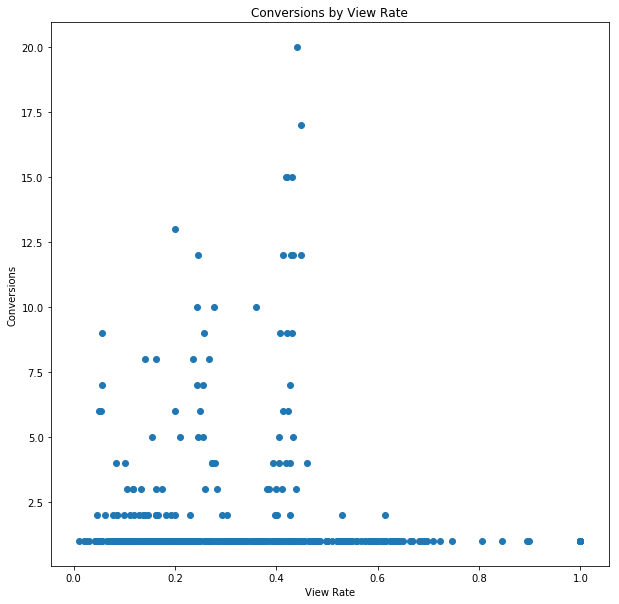

In [35]:
plt.figure(figsize=(10, 10))
plt.scatter(rocker['view_rate'], rocker['convs'])
plt.xlabel('View Rate')
plt.ylabel('Conversions')
plt.title('Conversions by View Rate')

Text(0.5, 1.0, 'Average Conversion Rate by Category')

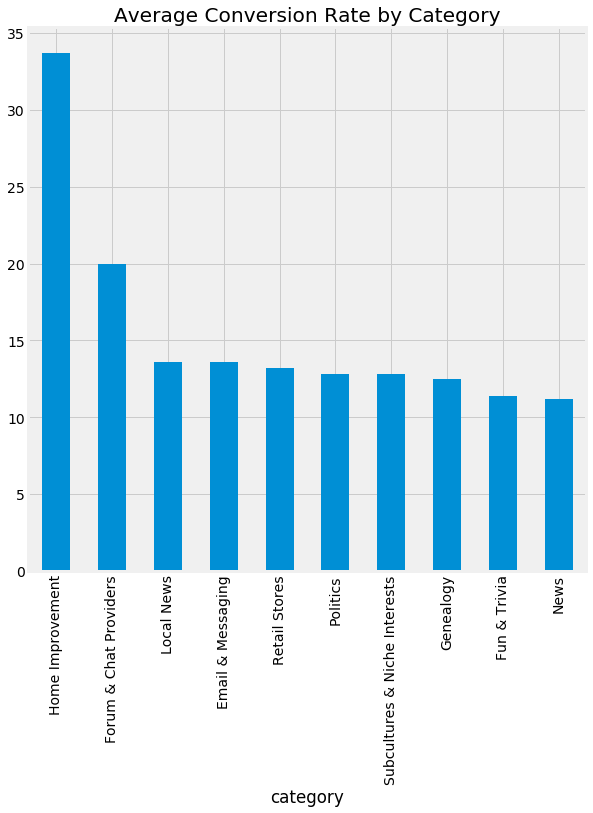

In [36]:
plt.figure(figsize=(10, 10))
style.use('fivethirtyeight')
rocker.groupby('category')['CR'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Average Conversion Rate by Category')

In [37]:
# groups 'Home and Garden' and 'Home & Garden' together
rocker['category'] = rocker['category'].apply(lambda x: x.replace('Home and Garden', 'Home & Garden'))

Text(0.5, 1.0, 'Average Impressions by Category')

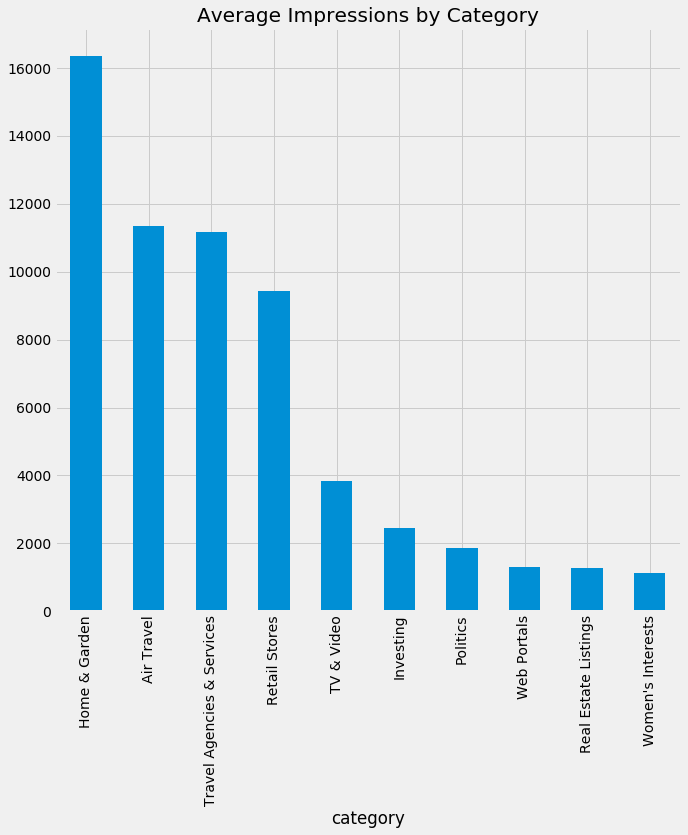

In [38]:
plt.figure(figsize=(10, 10))
style.use('fivethirtyeight')
rocker.groupby('category')['imps'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Average Impressions by Category')

## Q4 Exploration

Text(0.5, 1.0, 'Average Click Thru Rate by Domain')

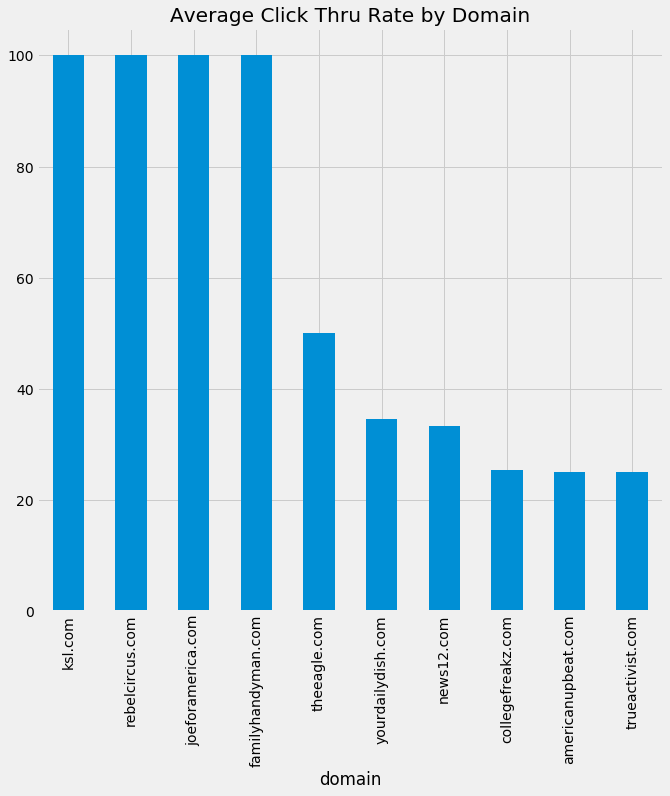

In [39]:
plt.figure(figsize=(10, 10))
style.use('fivethirtyeight')
rocker.groupby('domain')['CTR'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Average Click Thru Rate by Domain')

Text(0.5, 1.0, 'Amount of Ads by Category')

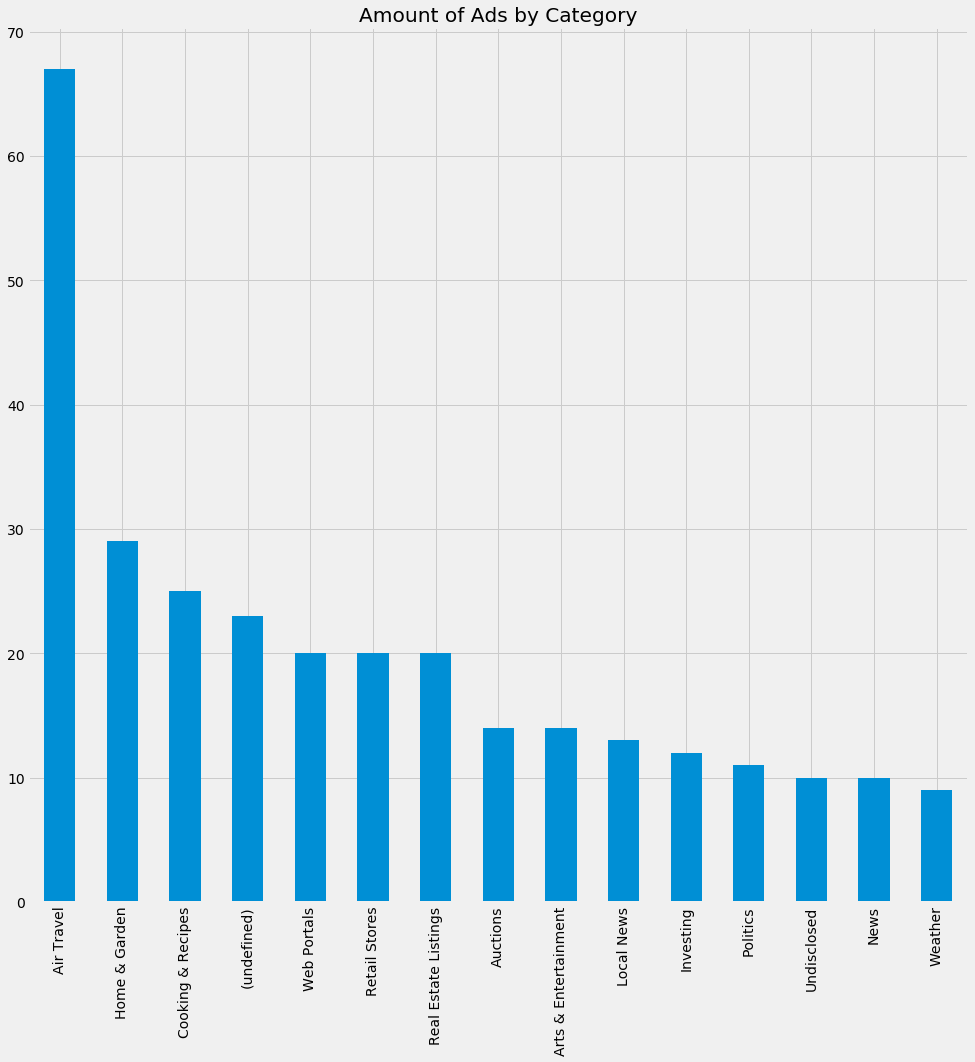

In [40]:
plt.figure(figsize=(15, 15))
style.use('fivethirtyeight')
rocker['category'].value_counts()[:15].plot(kind='bar')
plt.title('Amount of Ads by Category')

Text(0.5, 1.0, 'Average Conversion Rates by Domain')

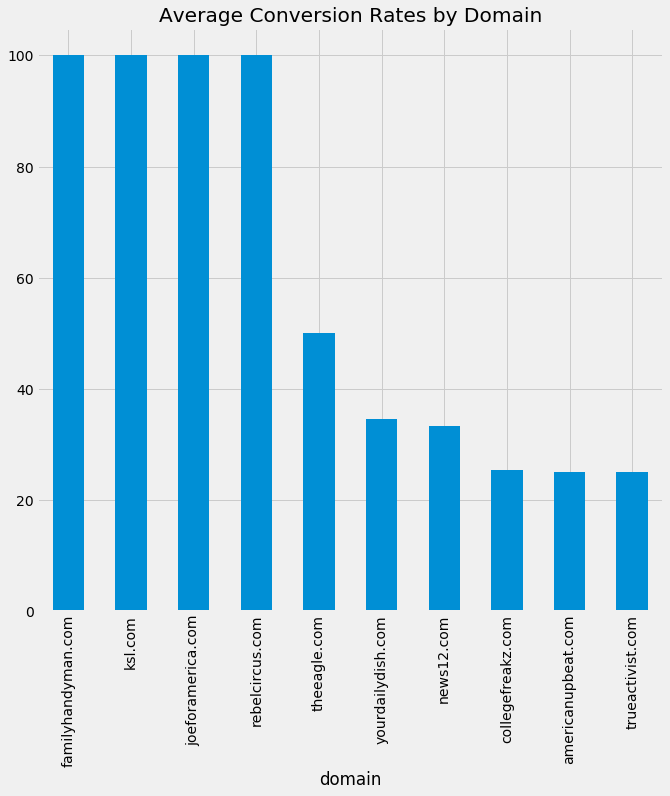

In [41]:
plt.figure(figsize=(10, 10))
style.use('fivethirtyeight')
rocker.groupby('domain')['CR'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Average Conversion Rates by Domain')

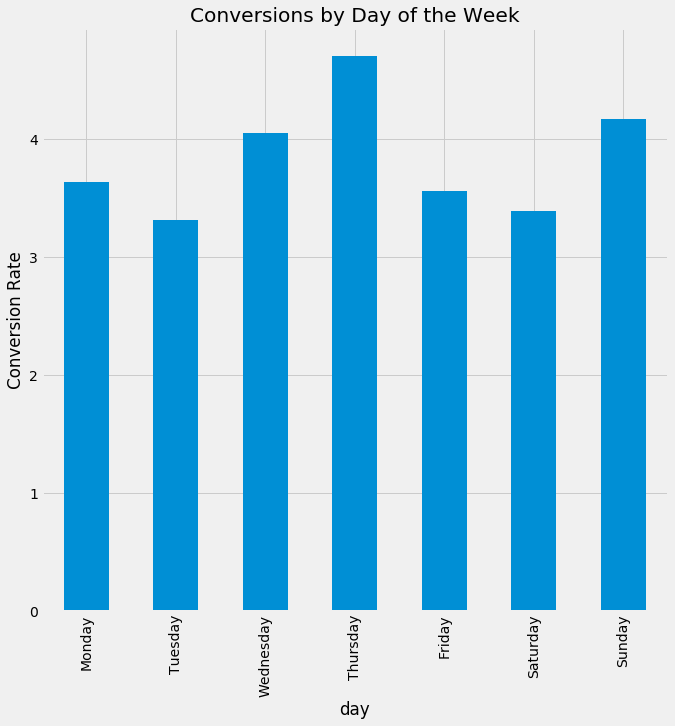

In [42]:
plt.figure(figsize=(10, 10))
style.use('fivethirtyeight')
rocker.groupby(rocker.index.weekday).mean()['CR'].plot(kind='bar')
plt.xticks([0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Conversion Rate')
plt.title('Conversions by Day of the Week');